# PyTorch for Beginners

In this notebook, we will try out the codes we used in the [PyTorch for Beginners](https://www.learnopencv.com/pytorch-for-beginners-basics/) blog.


 <img src='https://opencv.org/wp-content/uploads/2023/05/c3_w1_pytorch_basics_cover.jpg' width=700 align='center'><br/>

Let's start off by installing PyTorch.



## Table of Contents
* [1. Converting Image to tensors](#1.-Converting-Image-to-tensors)
* [2. Introduction to Tensors and its Operations](#2.-Introduction-to-Tensors-and-its-Operations)

* [3. Conclusion](#5.-Conclusion)




# Import Dependencies

In [ ]:
# Use this if you have conda installed
# !conda install -c pytorch pytorch

# Use this if you are on Google Colab
# or don't have conda installed
# !pip3 install torch

In [ ]:
# # Package to visualise computation graph
!pip install -q torchviz

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 9.9 MB/s eta 0:00:00


In [ ]:
'''# Download some digit images from MNIST dataset
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg" -O "mnist_0.jpg"
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg" -O "mnist_1.jpg"'''

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


Let's verify that we have the latest PyTorch version (1.1.0)

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
print("torch version : {}".format(torch.__version__))

torch version : 2.7.1+cpu


# 1. Converting Images to Batched tensors

An image is made up of pixel arrays that represent the intensity of pixels in grayscale or the color values in RGB format. When working with deep learning models, it's often necessary to convert these images into tensors, which are the primary data structures used in PyTorch for handling and processing data.

* **Tensors**: In PyTorch, tensors are multi-dimensional arrays similar to NumPy arrays, but with additional capabilities for GPU acceleration and automatic differentiation. Tensors are the fundamental building blocks for representing data and parameters in neural networks.
* **Batches**: Batching is a technique where multiple data samples (images, in this case) are grouped together into a single tensor. This allows efficient processing of multiple samples simultaneously, to take advantage of the parallel processing capabilities of modern hardware.


In the following block, we will see an example of converting two MNIST images into a single batched tensor of shape `[2,3,28,28]`

In [8]:
#download the images from the internet, !wget will not work in the vscode env, so use a python method

import requests
url_1="https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg"
filename_1="mnist_0.jpg"
response_1=requests.get(url_1)
with open(filename_1, "wb") as f:
    f.write(response_1.content)

In [11]:
url_2="https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg"
filename_2="mnist_1.jpg"
response_2=requests.get(url_2)
with open(filename_2, "wb") as f:
    f.write(response_2.content)

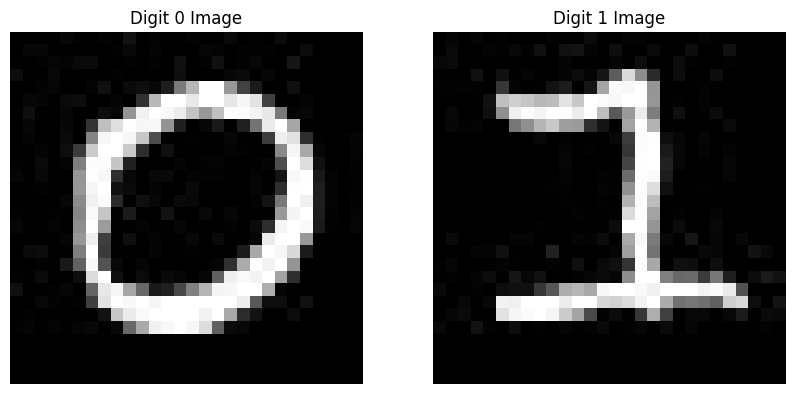

In [13]:
digit_0_array_og = cv2.imread("mnist_0.jpg")
digit_1_array_og = cv2.imread("mnist_1.jpg")

digit_0_array_gray = cv2.imread("mnist_0.jpg",cv2.IMREAD_GRAYSCALE )
digit_1_array_gray = cv2.imread("mnist_1.jpg",cv2.IMREAD_GRAYSCALE )

# Visualize the image

fig, axs = plt.subplots(1,2, figsize=(10,5))


axs[0].imshow(digit_0_array_og, cmap='gray',interpolation='none')
axs[0].set_title("Digit 0 Image")
axs[0].axis('off')

axs[1].imshow(digit_1_array_og, cmap="gray", interpolation = 'none')
axs[1].set_title("Digit 1 Image")
axs[1].axis('off')

plt.show()

In [15]:
#Numpy array with three channels
print("Image array shape: ",digit_0_array_og.shape)
print(f"Min pixel value:{np.min(digit_0_array_og)} ; Max pixel value : {np.max(digit_0_array_og)}")

Image array shape:  (28, 28, 3)
Min pixel value:0 ; Max pixel value : 255


In [ ]:
# We will have a look at 28x28 single channel image's pixel values
digit_0_array_gray

array([[  0,   0,   0,   0,   7,   1,   0,   3,   0,  18,   0,   3,   0,
          0,   3,   0,   0,   9,   0,   2,   0,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   7,   7,   0,   0,   0,   0,   0,   2,   8,   0,   4,   0,
          0,   0,   6,   4,   0,   2,   3,   2,   0,   0,  11,   0,   0,
          0,   0],
       [  1,   0,   2,   6,   4,   9,   9,   0,   0,   2,   0,   3,   1,
         15,   0,   2,  16,   0,   2,   7,   0,   0,  22,   0,   0,   0,
          0,   0],
       [ 12,   0,   0,   8,   1,   0,   0,   0,   2,   0,   0,   0,   0,
         14,   0,   0,   0,   7,   9,   0,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   3,   5,   0,   0,   4,  16,   0,  10,  14,   6,  29,
        122, 182, 255, 255, 152,  66,  26,   0,   0,  15,   0,   0,   0,
          0,   0],
       [  0,   7,   5,   0,   9,  12,   0,   0,   4,   0,  49, 184, 255,
        255, 232, 255, 255, 231, 246, 227,  64,   0,   0,   4,   0,   0,
          0,   0],
       [  2,  15,   0,   0,   6,   0,   0,  13,   6, 148, 241, 255, 248,
        236, 194, 151, 192, 253, 252, 244, 231, 121,   5,   6,   0,   0,
          0,   0],
       [  0,   7,   0,   0,   7,   0,  51, 191, 223, 254, 247, 248, 148,
         30,   0,   6,  24,   0,  32, 116, 235, 255, 166,   0,   0,   0,
          0,   0],
       [  0,   4,   0,   0,  10,   0, 132, 246, 255, 247, 199,  77,   0,
          0,   2,   0,   0,   7,   0,   0,  60, 238, 226,  46,   2,   0,
          1,   5],
       [  0,   0,   4,   0,  14,  59, 203, 255, 255, 201,  45,   1,  15,
          0,   0,   1,   0,   4,   2,   0,   0, 137, 246, 169,   7,   0,
          0,   4],
       [  2,   0,   9,   0,   4, 127, 252, 252, 198,  32,   0,   0,   0,
          5,   0,   3,   4,   0,   0,   1,   5,  78, 255, 222,  16,   1,
          0,   3],
       [  5,   0,   8,   0,   0, 150, 254, 247,  46,   7,   0,   8,   9,
          0,   4,   3,   3,   0,   0,   4,   0,  19, 248, 254,  25,   4,
          0,   2],
       [  0,   1,   2,   0,   1, 150, 246, 255,  17,   9,   0,   4,   0,
          0,   9,   0,   0,   0,   0,   6,   0,  46, 254, 255,  30,   5,
          0,   2],
       [  0,   1,   0,   0,   6, 139, 241, 251,  43,   0,  15,   6,   0,
          9,   7,   0,   0,   0,   0,   3,  19, 120, 255, 240,  31,   5,
          0,   3],
       [  2,   0,   0,   2,   1, 133, 249, 197,   0,  27,   0,   0,  18,
          0,   0,   8,   0,   7,   1,   0,   0, 153, 245, 255,  29,   3,
          0,   5],
       [  6,   0,   0,   4,   0, 142, 255, 156,   1,   0,   4,   0,   0,
          6,   0,   0,   0,   3,   0,  10,  45, 245, 255, 250,  26,   2,
          0,   6],
       [  0,   0,   0,   0,   5, 152, 239,  63,   0,  14,   0,   4,   0,
          1,   8,   0,   9,   0,   0,   5, 236, 255, 255, 152,   0,   0,
          0,   0],
       [  0,   9,  11,   0,   1, 126, 255,  59,   0,   1,   0,   5,   0,
          1,   2,   0,   0,   0,  27, 169, 255, 247, 217,  26,   0,   0,
          0,   0],
       [  0,   0,   2,   0,  25,  97, 248,  83,   7,   0,   6,   0,   1,
          0,   0,   0,   5,  47, 171, 255, 243, 255, 148,   0,   0,   0,
          0,   0],
       [  2,   0,  10,   0,   0,  13, 219, 255,  15,   0,  11,   0,   9,
          6,   0,   7,  97, 239, 249, 243, 255, 163,  46,   0,   0,   0,
          0,   0],
       [ 15,   0,   0,   2,   6,   0, 100, 232, 246, 166, 104,  24,  32,
         72, 128, 180, 245, 247, 255, 255, 174,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   8,   3,   0,   2,  63, 226, 254, 248, 255, 246, 255,
        255, 255, 255, 255, 255, 237,  88,  13,  13,   0,  17,   0,   0,
          0,   0],
       [  0,   2,   0,   0,   0,   0,   0,  18, 199, 235, 250, 255, 255,
        255, 255, 242, 255, 169,  43,  18,   0,   0,  11,   0,   0,   0,
          0,   0],
       [  2,   5,   0,   4,   1,   5,   8,   0,   9, 104, 169, 241, 248,
        255, 247, 220,  95,  10,   7,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

### 1.1. Convert Numpy array to Torch tensors

Shape of Normalised Digit 0 Tensor:  torch.Size([28, 28, 3])
Normalised Min pixel value: 0.0 ; Normalised Max pixel value : 1.0


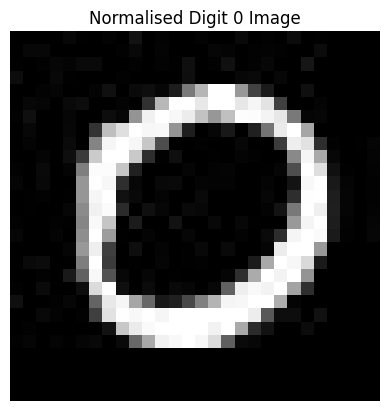

In [ ]:
# Convert the images to PyTorch tensors and normalize
img_tensor_0 = torch.tensor(digit_0_array_og, dtype=torch.float32) / 255.0
img_tensor_1 = torch.tensor(digit_1_array_og, dtype=torch.float32) / 255.0

print("Shape of Normalised Digit 0 Tensor: ", img_tensor_0.shape)
print(f"Normalised Min pixel value: {torch.min(img_tensor_0)} ; Normalised Max pixel value : {torch.max(img_tensor_0)}")

plt.imshow(img_tensor_0,cmap="gray")
plt.title("Normalised Digit 0 Image")
plt.axis('off')
plt.show()

### 1.2. Creating Input Batch

In [ ]:
batch_tensor = torch.stack([img_tensor_0, img_tensor_1])

# In PyTorch the forward pass of input images to the model is expected to have a batch_size > 1
print("Batch Tensor Shape:", batch_tensor.shape)

Batch Tensor Shape: torch.Size([2, 28, 28, 3])


Additionally in PyTorch, image tensors typically follow the shape convention **[N
,C ,H ,W]** unlike tensorflow which follows [N, H, W, C].

Therefore, we need to bring the color channel to the second dimension. This can be achieved using either `torch.view()` or `torch.permute()`.


In [ ]:
batch_input = batch_tensor.permute(0,3,1,2)
print("Batch Tensor Shape:", batch_input.shape)

Batch Tensor Shape: torch.Size([2, 3, 28, 28])


# 2. Introduction to Tensors and its Operations

We have seen the importance of tensors, now will understand it from ground up.
Tensor is simply a fancy name given to matrices. If you are familiar with NumPy arrays, understanding and using PyTorch Tensors will be very easy. A scalar value is represented by a 0-dimensional Tensor. Similarly, a column/row matrix is represented using a 1-D Tensor and so on. Some examples of Tensors with different dimensions are shown for you to visualize and understand.

<img src=https://learnopencv.com/wp-content/uploads/2019/05/PyTorch-Tensors.jpg width = 400 height=350>

## 2.1. Construct your first Tensor

Let’s see how we can create a PyTorch Tensor.

In [ ]:
# Create a Tensor with just ones in a column
a = torch.ones(5)
# Print the tensor we created
print(a)

# Create a Tensor with just zeros in a column
b = torch.zeros(5)
print(b)

tensor([1., 1., 1., 1., 1.])
tensor([0., 0., 0., 0., 0.])


We can similarly create Tensor with custom values as shown below.

In [ ]:
c = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
print(c)

tensor([1., 2., 3., 4., 5.])


In all the above cases, we have created vectors or Tensors of dimension 1. Now, let’s create some tensors of higher dimension.

In [ ]:
d = torch.zeros(3,2)
print(d)

e = torch.ones(3,2)
print(e)

f = torch.tensor([[1.0, 2.0],[3.0, 4.0]])
print(f)

# 3D Tensor
g = torch.tensor([[[1., 2.], [3., 4.]], [[5., 6.], [7., 8.]]])
print(g)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


We can also find out the shape of a Tensor using **`.shape`** method.

In [ ]:
print(f.shape)

print(e.shape)

print(g.shape)

torch.Size([2, 2])
torch.Size([3, 2])
torch.Size([2, 2, 2])


## 2.2. Access an element in Tensor

Now that we have created some tensors, let’s see how we can access an element in a Tensor. First let’s see how to do this for 1D Tensor aka vector.

In [ ]:
# Get element at index 2
print(c[2])

tensor(3.)


What about 2D or 3D Tensor? Recall what we mentioned about **dimension of a tensor**.

To access one particular element in a tensor, we will need to specify indices equal to the dimension of the tensor. That’s why for tensor **`c`** we only had to specify one index.

In [ ]:
# All indices starting from 0

# Get element at row 1, column 0
print(f[1,0])

# We can also use the following
print(f[1][0])

# Similarly for 3D Tensor
print(g[1,0,0])
print(g[1][0][0])

tensor(3.)
tensor(3.)
tensor(5.)
tensor(5.)


But what if you wanted to access one entire row in a 2D Tensor?

In [ ]:
# All elements
print(f[:])

# All elements from index 1 to 2 (inclusive)
print(c[1:3])

# All elements till index 4 (exclusive)
print(c[:4])

# First row
print(f[0,:])

# Second column
print(f[:,1])

tensor([[1., 2.],
        [3., 4.]])
tensor([2., 3.])
tensor([1., 2., 3., 4.])
tensor([1., 2.])
tensor([2., 4.])


## 2.3. Specify data type of elements

Whenever we create a tensor, PyTorch decides the data type of the elements of the tensor such that the data type can cover all the elements of the tensor. We can override this by specifying the data type while creating the tensor.

In [ ]:
int_tensor = torch.tensor([[1,2,3],[4,5,6]])
print(int_tensor.dtype)

# What if we changed any one element to floating point number?
int_tensor = torch.tensor([[1,2,3],[4.,5,6]])
print(int_tensor.dtype)
print(int_tensor)

# This can be overridden as follows
float_tensor = torch.tensor([[1, 2, 3],[4., 5, 6]])
int_tensor = float_tensor.type(torch.int64)
print(int_tensor.dtype)
print(int_tensor)

torch.int64
torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.int64
tensor([[1, 2, 3],
        [4, 5, 6]])


## 2.4. Tensor to/from NumPy Array

We have mentioned several times that PyTorch Tensors and NumPy arrays are pretty similar. This of course demands the question if it’s possible to convert one data structure into another. Let’s see how we can do this.

In [ ]:
# Tensor to Array
f_numpy = f.numpy()
print(f_numpy)

# Array to Tensor
h = np.array([[8,7,6,5],[4,3,2,1]])
h_tensor = torch.from_numpy(h)
print(h_tensor)

[[1. 2.]
 [3. 4.]]
tensor([[8, 7, 6, 5],
        [4, 3, 2, 1]])


## 2.5. Arithmetic Operations on Tensors

Now it’s time for the next step. Let’s see how we can perform arithmetic operations on PyTorch tensors.

In [ ]:
# Create tensor
tensor1 = torch.tensor([[1,2,3],[4,5,6]])
tensor2 = torch.tensor([[-1,2,-3],[4,-5,6]])

# Addition
print(tensor1+tensor2)
# We can also use
print(torch.add(tensor1,tensor2))

# Subtraction
print(tensor1-tensor2)
# We can also use
print(torch.sub(tensor1,tensor2))

# Multiplication
# Tensor with Scalar
print(tensor1 * 2)

# Tensor with another tensor
# Elementwise Multiplication
print(tensor1 * tensor2)

# Matrix multiplication
tensor3 = torch.tensor([[1,2],[3,4],[5,6]])
print(torch.mm(tensor1,tensor3))

# Division
# Tensor with scalar
print(tensor1/2)

# Tensor with another tensor
# Elementwise division
print(tensor1/tensor2)

tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
tensor([[ -1,   4,  -9],
        [ 16, -25,  36]])
tensor([[22, 28],
        [49, 64]])
tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])
tensor([[-1.,  1., -1.],
        [ 1., -1.,  1.]])


## 2.6. Broadcasting

   - `a` is a 1-dimensional tensor with shape \([ 3 ]\).
   - `b` is a scalar tensor with shape \([ ]\).
   - When adding `a` and `b`, PyTorch broadcasts `b` to match the shape of `a`, resulting in \([ 1 + 4, 2 + 4, 3 + 4 ]\).


In [ ]:
# Create two 1-dimensional tensors
a = torch.tensor([1, 2, 3])
b = torch.tensor([4])

# adding a scalar to a vector
result = a + b

print("Result of Broadcasting:\n",result)

Result of Broadcasting:
 tensor([5, 6, 7])


[Broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html#broadcasting-semantics) allows PyTorch to perform element-wise operations on tensors of
   - `a` is a 2-dimensional tensor with shape \([1, 3]\).
   - `b` is a 2-dimensional tensor with shape \([3, 1]\).
   - When adding `a` and `b`, PyTorch broadcasts both tensors to the common shape \([3, 3]\), resulting in:
   
     \
     \begin{bmatrix}
     1+4 & 2+4 & 3+4 \\
     1+5 & 2+5 & 3+5 \\
     1+6 & 2+6 & 3+6 \\
     \end{bmatrix}
     \.




In [ ]:
# Create two tensors with shapes (1, 3) and (3, 1)
a = torch.tensor([[1, 2, 3]])
b = torch.tensor([[4], [5], [6]])

# adding tensors of different shapes
result = a + b
print("Shape: ", result.shape)
print("\n")
print("Result of Broadcasting:\n", result)

Shape:  torch.Size([3, 3])


Result of Broadcasting:
 tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])


## 2.7. CPU v/s GPU Tensor

Let’s first see how to create a tensor for GPU.

In [ ]:
# Create a tensor for CPU
# This will occupy CPU RAM
tensor_cpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cpu')

# Create a tensor for GPU
# This will occupy GPU RAM
tensor_gpu = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]], device='cuda')

Just like tensor creation, the operations performed for CPU and GPU tensors are also different and consume RAM corresponding to the device specified.

In [ ]:
# This uses CPU RAM
tensor_cpu = tensor_cpu * 5

# This uses GPU RAM
# Focus on GPU RAM Consumption
tensor_gpu = tensor_gpu * 5

We can move the GPU tensor to CPU and vice versa as shown below.

In [ ]:
# Move GPU tensor to CPU
tensor_gpu_cpu = tensor_gpu.to(device='cpu')

# Move CPU tensor to GPU
tensor_cpu_gpu = tensor_cpu.to(device='cuda')

# 3. Conclusion


In this notebook, we started with constructing simple tensors and manipulating them.
In the upcoming notebooks, we will go deeper into backpropagation and various computer vision tasks such as Classification, Segmentation, Object Detection, and Instance Segmentation. Each notebook will provide a detailed explanation and hands-on examples to help you serve as starter notebooks to master the essential tasks in computer vision.